## Part 1: Exploring the friendship paradox.

Part 1 of the assignment covers the following four exercises from week 3:

- A. The friendship paradox in BA networks
- B. The friendship paradox more generally
- C. The friendship paradox and the configuration model
- D. Growth without preferential attachment

> Exercise 1A. The friendship paradox in BA networks
> * Pick a node $i$ at random and calculate their average degree.
> * Compare the two numbers to check if it's true that $i$'s friends (on average) have more friends than $i$.
> * Do this 1000 times. How many out of those 1000 times is the friendship paradox true in **F-BA**?

In this exercise, we'll explore the friendship paradox in Barabási-Albert (BA) networks. The friendship paradox states that, on average, most people have fewer friends than their friends have. We'll use a BA network model to test this phenomenon.

In [28]:
import networkx as nx
import random

#Parts of this code was generated by Claude3.5 and afterwards modified by Jonatan s183649
n = 5000
m = 2  # Amount of edges to attach from a new node to existing nodes
F_BA = nx.barabasi_albert_graph(n, m)

def check_friendship_paradox():
    i = random.choice(list(F_BA.nodes()))
    i_degree = F_BA.degree(i)

    neighbors = list(F_BA.neighbors(i))
    neighbor_degrees = [F_BA.degree(neighbor) for neighbor in neighbors]
    avg_neighbor_degree = sum(neighbor_degrees) / len(neighbors) if neighbors else 0
    return avg_neighbor_degree > i_degree

# We do 1000 trials as this is specified in the assignment
num_trials = 1000
paradox_count = sum(check_friendship_paradox() for _ in range(num_trials))
paradox_percentage = (paradox_count / num_trials) * 100

print(f"The friendship paradox held true in {paradox_count} out of {num_trials} trials.")
print(f"Percentage: {paradox_percentage:.2f}%")

The friendship paradox held true in 878 out of 1000 trials.
Percentage: 87.80%


 In our very first simulation with 1000 trials, the friendship paradox held true ~87.8% of the time in our Barabási-Albert (BA) network. We ran the simulation multiple times with up to 100k tries, and 88.5% seems to be the average from our observations.


> Exercise 1B. The friendship paradox more generally
> * What if the power law is flatter, e.g. $p(k) \sim k^{-\gamma}$ with $\gamma = 2$? Will the fraction of times the paradox is true be higher or lower? First answer this question by simply reasoning. Then simulate a new network with the slope mentioned above. Did you reason correctly, and for what fraction of the time is the friendship paradox true for your network with a new slope?


When the power law is flatter (γ = 2 instead of a steeper value like 3), it means that high-degree nodes (hubs) are more common across the network. In other words, the tail of the distribution is "fatter", and there's a higher probability of encountering nodes with very high degrees.
Given this, we can reason that the friendship paradox would likely be even more pronounced in a network with a flatter power law. This is because:

- There are more high-degree nodes, increasing the chances that a randomly chosen node is connected to one or more of these hubs.
- The average degree of friends is likely to be pulled up even more by these numerous high-degree nodes.

Because of this, we would expect the fraction of times the paradox is true to be higher in a network with γ = 2 compared to a steeper power law such as γ = 3.

A simple calculation can verify our hypothesis:

In [32]:
import networkx as nx
import numpy as np
import random

#Parts of this code was generated by Claude3.5 and afterwards modified by Jonatan s183649

def generate_power_law_sequence(n, gamma, x_min=1):
    alpha = gamma - 1
    sequence = [int(round(x_min * (1 - random.random()) ** (-1/alpha))) for _ in range(n)]
    if sum(sequence) % 2 != 0:
        sequence[0] += 1
    return sequence

def check_friendship_paradox(G):
    i = random.choice(list(G.nodes()))
    i_degree = G.degree(i)
    neighbors = list(G.neighbors(i))
    neighbor_degrees = [G.degree(neighbor) for neighbor in neighbors]
    avg_neighbor_degree = sum(neighbor_degrees) / len(neighbors) if neighbors else 0
    return avg_neighbor_degree > i_degree

#Generate the network
n = 5000
gamma = 2
sequence = generate_power_law_sequence(n, gamma)
G = nx.configuration_model(sequence)
G = nx.Graph(G)

#Friendship paradox
num_trials = 10000
paradox_count = sum(check_friendship_paradox(G) for _ in range(num_trials))
paradox_percentage = (paradox_count / num_trials) * 100
print(f"The friendship paradox held true in {paradox_count} out of {num_trials} trials.")
print(f"Percentage: {paradox_percentage:.2f}%")

The friendship paradox held true in 9722 out of 10000 trials.
Percentage: 97.22%


The calculation confirms our hypothesis, as our result went from ~88.5% to 97.2% with a flatter power law. With this simple change in power law, the friendship paradox is nearly 5 times more likely to hold true! 


> Exercise 1C. The friendship paradox and the configuration model
> - Now generate a network for the configuration model that has *the same slope and number of nodes as **F-BA** in A above*; let's call this new network **F-CM**.
>    - What fraction of the time is the friendship paradox is true for the **F-CM** network?
>    - Assuming that **F-BA** and **F-CM** have the same degree sequence can now *think* about if **F-BA** and **F-CM** are different with respect to the friendship paradox. Are there factors beyond the degree-distribution that could impact how frequently the friendship paradox is true? How would you test more rigorously if the friendship-paradox is actually true equally often in **F-BA** and **F-CM**?


To compare the friendship paradox in F-BA and F-CM networks, we'll first generate a Configuration Model (CM) network with the same degree sequence as our BA network, then test the friendship paradox on both.

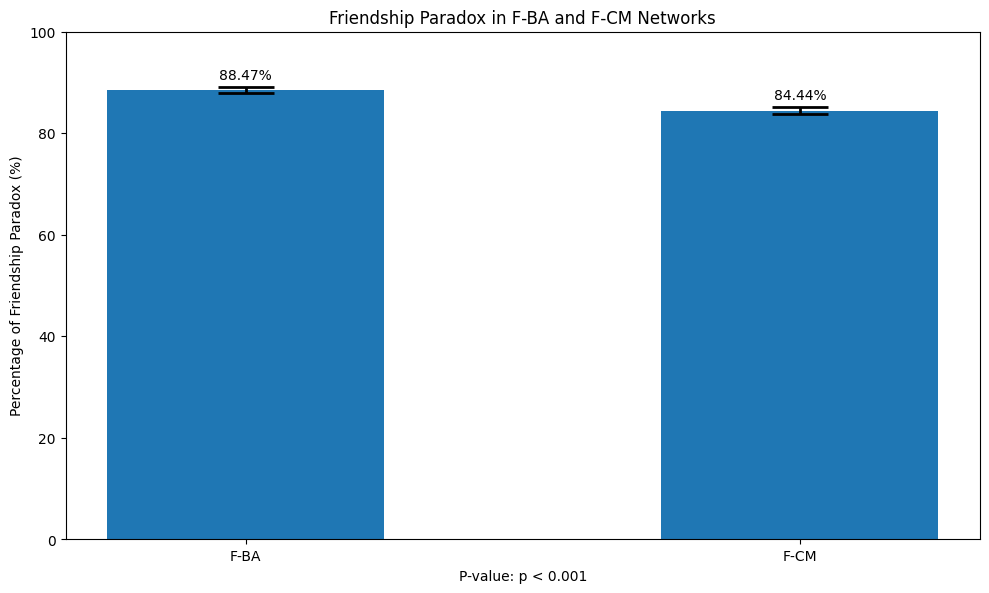

Friendship paradox in F-BA: 88.47%
Friendship paradox in F-CM: 84.44%
P-value: 7.813261135034627e-17
95% CI for F-BA: (87.84%, 89.10%)
95% CI for F-CM: (83.73%, 85.15%)


In [68]:
import networkx as nx
import random
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

#Parts of this code was generated by Claude3.5 and afterwards modified by Jonatan s183649

#Networks
n = 5000
m = 2
F_BA = nx.barabasi_albert_graph(n, m)

degree_sequence = [d for n, d in F_BA.degree()]
F_CM = nx.configuration_model(degree_sequence)
F_CM = nx.Graph(F_CM)

def check_friendship_paradox(G):
    i = random.choice(list(G.nodes()))
    i_degree = G.degree(i)
    neighbors = list(G.neighbors(i))
    neighbor_degrees = [G.degree(neighbor) for neighbor in neighbors]
    avg_neighbor_degree = sum(neighbor_degrees) / len(neighbors) if neighbors else 0
    return avg_neighbor_degree > i_degree

#Trials
num_trials = 10000
ba_results = [check_friendship_paradox(F_BA) for _ in range(num_trials)]
cm_results = [check_friendship_paradox(F_CM) for _ in range(num_trials)]

ba_percentage = sum(ba_results) / num_trials * 100
cm_percentage = sum(cm_results) / num_trials * 100

_, p_value = stats.ttest_ind(ba_results, cm_results)
ba_ci = stats.norm.interval(0.95, loc=ba_percentage, scale=stats.sem(ba_results) * 100)
cm_ci = stats.norm.interval(0.95, loc=cm_percentage, scale=stats.sem(cm_results) * 100)

#Plotting
fig, ax = plt.subplots(figsize=(10, 6))
x = ['F-BA', 'F-CM']
y = [ba_percentage, cm_percentage]
yerr = [[y[0] - ba_ci[0], cm_percentage - cm_ci[0]], [ba_ci[1] - y[0], cm_ci[1] - y[1]]]

bars = ax.bar(x, y, yerr=yerr, capsize=20, width=0.5, ecolor='black', error_kw={'elinewidth': 2, 'capthick': 2})
ax.set_ylabel('Percentage of Friendship Paradox (%)')
ax.set_ylim(0, 100)  # Set y-axis range from 0 to 100
ax.set_title('Friendship Paradox in F-BA and F-CM Networks')

for i, bar in enumerate(bars):
    height = bar.get_height()
    ci = ba_ci if i == 0 else cm_ci
    ax.text(bar.get_x() + bar.get_width()/2, height + yerr[1][i] + 1,
            f'{height:.2f}%',
            ha='center', va='bottom')
ax.text(0.5, -0.08, f'P-value: p < 0.001', ha='center', transform=ax.transAxes)
plt.tight_layout()
plt.show()

print(f'Friendship paradox in F-BA: {ba_percentage:.2f}%')
print(f'Friendship paradox in F-CM: {cm_percentage:.2f}%')
print(f'P-value: {p_value}')
print(f'95% CI for F-BA: ({ba_ci[0]:.2f}%, {ba_ci[1]:.2f}%)')
print(f'95% CI for F-CM: ({cm_ci[0]:.2f}%, {cm_ci[1]:.2f}%)')

We performed 10000 trials, and the results show that the friendship paradox holds true in both F-BA and F-CM networks, with the frequency being 84.4% in the F-CM network (due to randomness, this number changes a bit as we re-run the calculation). It should be noted that this is a lower frequency than the F-BA network (88.5%) Which can be explained by the clustering of BA networks being higher.

To test more rigorously if the friendship paradox is equally true in F-BA and F-CM:

1. For our 10000 trials, we calculate the mean and confidence intervals for both networks.
2. We use a t-test to compare the results statistically. We observe that p < 0.001, and can conclude that there is a significant difference in how often the friendship paradox holds true in F-BA and F-CM networks.
3. To visualize the results, we have created a bar plot with error bars representing the 95% confidence intervals.

> Exercise 1D. Growth without preferential attachment
> * Build a network of same size and degree as in the exercise above, *using the growth mechanism without the preferential attachment*.
> 
>  1. Grow a new network (the Sune-network) with the same parameters as the **F-BA** network in the exercise above, i.e. 5000 nodes, each new node connects to the existing network, but with one key difference: *have the incoming nodes connect to the existing nodes with* **equal probability**. This is the Sune-network.
>  2. Generate an ER network of same number of nodes and links as the Sune-network. 
> * What are the differences between the ER network and the Sune-network?

In this exercise, we'll compare two network models: the Sune-network, which grows without preferential attachment, and an Erdős-Rényi (ER) network with the same number of nodes and edges. We'll analyze their degree distributions, connected components, and clustering coefficients to understand the differences between these network structures.

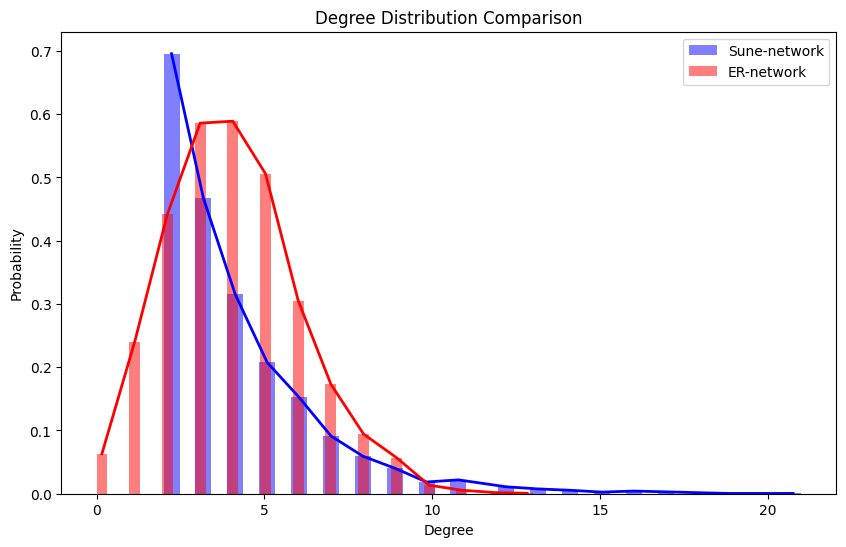

Number of connected components in Sune-network: 1
Number of connected components in ER-network: 107
Average clustering coefficient in Sune-network: 0.0013
Average clustering coefficient in ER-network: 0.0004


In [102]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np

#Parts of this code was generated by Claude3.5 and afterwards modified by Jonatan s183649

#Networks
def grow_sune_network(n, m):
    G = nx.Graph()
    G.add_nodes_from(range(m))
    for i in range(m, n):
        existing_nodes = list(G.nodes())
        new_edges = random.sample(existing_nodes, m)
        G.add_edges_from([(i, node) for node in new_edges])
    return G

n = 5000
m = 2
Sune_network = grow_sune_network(n, m)

num_edges = Sune_network.number_of_edges()
ER_network = nx.gnm_random_graph(n, num_edges)

#Plots
def plot_degree_distribution(G, label, color):
    degrees = [d for n, d in G.degree()]
    hist, bin_edges = np.histogram(degrees, bins=40, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    plt.bar(bin_centers, hist, alpha=0.5, width=np.diff(bin_edges), label=label, color=color)
    return bin_centers, hist

plt.figure(figsize=(10, 6))
sune_centers, sune_hist = plot_degree_distribution(Sune_network, "Sune-network", "blue")
er_centers, er_hist = plot_degree_distribution(ER_network, "ER-network", "red")

def plot_connected_line(centers, hist, color):
    non_zero = hist > 0
    plt.plot(centers[non_zero], hist[non_zero], color=color, linestyle='-', linewidth=2)

plot_connected_line(sune_centers, sune_hist, 'blue')
plot_connected_line(er_centers, er_hist, 'red')
plt.xlabel("Degree")
plt.ylabel("Probability")
plt.title("Degree Distribution Comparison")
plt.legend()
plt.show()

sune_components = nx.number_connected_components(Sune_network)
er_components = nx.number_connected_components(ER_network)
print(f"Number of connected components in Sune-network: {sune_components}")
print(f"Number of connected components in ER-network: {er_components}")

sune_clustering = nx.average_clustering(Sune_network)
er_clustering = nx.average_clustering(ER_network)
print(f"Average clustering coefficient in Sune-network: {sune_clustering:.4f}")
print(f"Average clustering coefficient in ER-network: {er_clustering:.4f}")

Despite both networks lacking the strong preferential attachment seen in scale-free networks, we can observe the following differences between the Sune-network and the ER network:

The number of connected components in the Sune-network is 1, whereas the number of connected components in the ER-network is 106 (likely a few main component alongside many isolated nodes). This is a staggering difference, and by plotting the degree distribution, we can see that the Sune network in fact has no nodes with a degree of 0 and 1. We assume that this happens due to the incoming nodes connecting to the existing nodes with equal probability.

We also observe that the clustering coefficient in the Sune-network is 2-3 times greater than the clustering coefficient of the ER-network. The exact difference changes each time we run the calculation (due to randomness), but this is also a clear difference between the two networks, and it shows that the Sune-network has a more local structure. This is because the growth process tends to create more triangles as new nodes connect to existing nodes that are already connected.